In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
image = x_train[12]

In [7]:
image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  12,  99,  91, 142, 155, 246, 182, 155, 155, 155,
        155, 131,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
y_train.shape

(60000,)

In [11]:
y_sample = to_categorical(y_train)

In [12]:
y_sample

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_sample.shape


(60000, 10)

In [15]:
y_sample[12]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
image.max()

255

In [19]:
image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

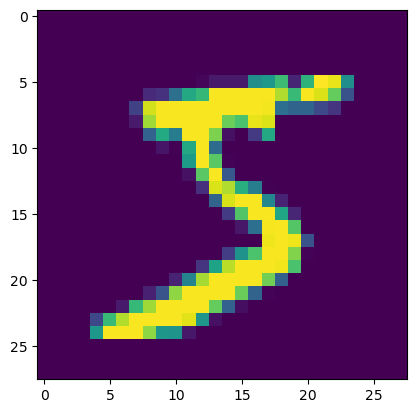

In [23]:
plt.imshow(scaled_single)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [37]:
model.fit(x_train,y_cat_train,epochs=3,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/3
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1430 - accuracy: 0.9576 - val_loss: 0.0660 - val_accuracy: 0.9783
Epoch 2/3
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.0400 - val_accuracy: 0.9857
Epoch 3/3
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0309 - accuracy: 0.9901 - val_loss: 0.0416 - val_accuracy: 0.9867


In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
losses = pd.DataFrame(model.history.history)

In [40]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.143044,0.957583,0.065974,0.9783
1,0.047915,0.985333,0.039962,0.9857
2,0.030907,0.990083,0.041615,0.9867


<AxesSubplot:>

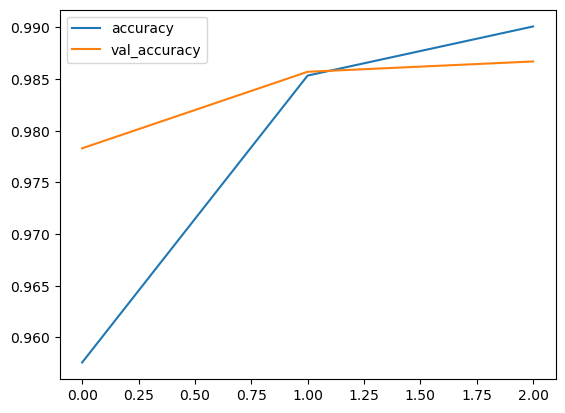

In [41]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

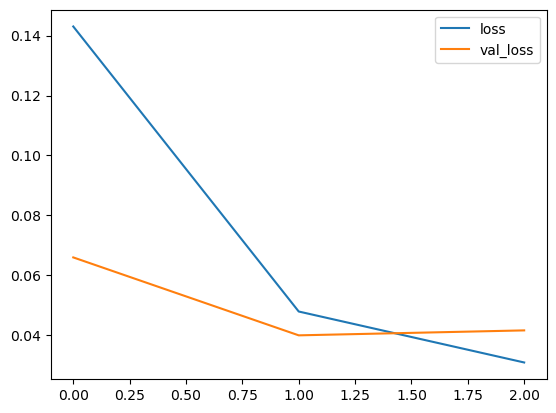

In [42]:
losses[['loss','val_loss']].plot()

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04161546006798744, 0.9866999983787537]


In [44]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [45]:
y_cat_test.shape

(10000, 10)

In [46]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [47]:
classes_x[0]

7

In [48]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [49]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [50]:
confusion_matrix(y_test,classes_x)

array([[ 973,    1,    1,    1,    0,    0,    2,    0,    2,    0],
       [   0, 1130,    1,    1,    0,    0,    1,    0,    2,    0],
       [   1,    2, 1022,    3,    0,    0,    1,    3,    0,    0],
       [   0,    0,    0, 1006,    0,    2,    0,    1,    1,    0],
       [   0,    1,    2,    0,  959,    0,    2,    0,    4,   14],
       [   0,    0,    0,   15,    0,  874,    2,    0,    1,    0],
       [   5,    2,    0,    0,    2,    2,  945,    0,    2,    0],
       [   0,    1,    7,    0,    1,    0,    0, 1016,    1,    2],
       [   2,    0,    4,    4,    0,    0,    0,    2,  961,    1],
       [   0,    1,    0,    6,    4,    7,    0,    7,    3,  981]],
      dtype=int64)

In [51]:
testing_number = x_test[5]

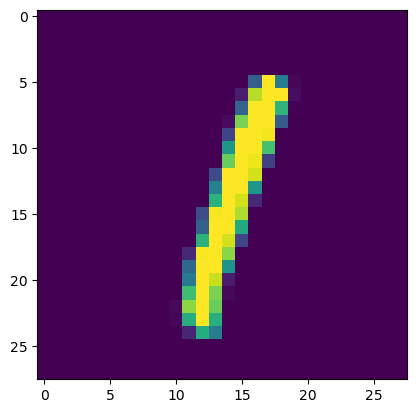

In [52]:
plt.imshow(testing_number.reshape(28,28))

In [53]:
predict_x=model.predict(testing_number.reshape(1,28,28,1)) 
classes_x=np.argmax(predict_x,axis=1)
classes_x

1/1 [==============================] - 0s 16ms/step


array([1], dtype=int64)